<a href="https://colab.research.google.com/github/Kotas0827/mysite/blob/main/20250509_NISQ1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install qiskit[visualization]
! pip install qiskit-ibm-runtime
! pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3e19a2c12f3c91631c9f8a58e006935482e114f780e78fe6c1cd062b0c91fdd5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# macOSの場合
! brew install graphviz

/bin/bash: line 1: brew: command not found


In [ ]:
# 1
# 各種ライブラリをimportします
import matplotlib.pyplot as plt
import time
import math
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import grover_operator
from qiskit.circuit.library import MCXGate

from qiskit.visualization import plot_histogram
from qiskit.visualization import pass_manager_drawer
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit import transpile
from qiskit.circuit.library import MCXGate
from qiskit.circuit.library import ZGate
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

from qiskit import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    ConsolidateBlocks,
    UnitarySynthesis,
)

# 量子コンピューティング1A 第5回　NISQ1
今回の演習では現代の量子計算機の最も重要な課題であるノイズに関して学びます。

今回の演習ではQiskit　Aer simulator、ノイズ付きシミュレータ、量子コンピュータ実機を使います。IBM Quantum のユーザ登録をしてください。また、実機は量子回路のジョブキューが長い場合はすぐに実行できるとは限らないので、余裕を持って課題を実行してください。

In [ ]:
#2
token = "06977564231c8f91e380b960819d84bbe54e8cb8d4c0f8fd225ccdade4073f8ac47e6d6c27f663e3174afc1d117385247a343d300fb0b6fdd31c511b2aeca1b7" # 自分のAPIトークンで置き換えて実行してください。

In [ ]:
#3
service = QiskitRuntimeService(
    channel="ibm_quantum", instance="ibm-q/open/main", token=token
)

<ipython-input-5-30439250dc80>:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


In [ ]:
#4
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)
print(f"Using backend: {backend}")

Using backend: <IBMBackend('ibm_brisbane')>


In [ ]:
#5
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



In [ ]:
#6 性能
backend.qubit_properties(0)  # properties of qubit 0

QubitProperties(t1=0.00031532988680168524, t2=5.750866390239143e-05, frequency=4721905778.483436)

In [ ]:
# 7

def run_qc_on_aer(qc):
  # Qiskit Aer Simulatorを使用して量子回路を実行
  simulator = AerSimulator()
  print(f"Using backend:" + "AerSimulator")
  compiled_circuit = transpile(qc, simulator)
  result = simulator.run(compiled_circuit).result()
  counts = result.get_counts()
  return counts

In [ ]:
#8
def run_qc_on_noised_simulator(qc, backend):
  # Qiskit Aer Simulatorを使用して量子回路を実行
    print(f"Using fakce backend: {backend.name}")
    noise_model = NoiseModel.from_backend(backend)
    simulator = AerSimulator(noise_model=noise_model)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    return counts

In [ ]:
#9
def run_qc_on_ibmq(qc, backend):
    # バックエンドの名前を表示
    print(f"Using backend: {backend.name}")

    # 回路をトランスパイル
    transpiled_circuit = transpile(qc, backend=backend, optimization_level=0)

    # Samplerインスタンス生成
    sampler = Sampler(backend)
    sampler.options.default_shots = 1000

    # 実行と結果取得
    job = sampler.run([transpiled_circuit])
    result = job.result()[0]
    counts = result.join_data().get_counts()
    return counts

In [ ]:
#10
def create_grover_circuit(n, target_bitstring):
    if len(target_bitstring) != n:
        raise ValueError("target_bitstring must be of length n")

    r = math.floor((math.pi / 4) * math.sqrt(2 ** n))  # 最適反復回数
    qc = QuantumCircuit(n)

    # 初期状態
    qc.h(range(n))

    # Oracle
    oracle = QuantumCircuit(n)
    for i, bit in enumerate(target_bitstring):
        if bit == '0':
            oracle.x(i)
    oracle.append(ZGate().control(n - 1), list(range(n)))
    for i, bit in enumerate(target_bitstring):
        if bit == '0':
            oracle.x(i)
    oracle_gate = oracle.to_gate(label="Oracle")

    # Diffuser
    diffuser = QuantumCircuit(n)
    diffuser.h(range(n))
    diffuser.x(range(n))
    diffuser.append(ZGate().control(n - 1), list(range(n)))
    diffuser.x(range(n))
    diffuser.h(range(n))
    diffuser_gate = diffuser.to_gate(label="Diffuser")

    # Grover反復
    for _ in range(r):
        qc.append(oracle_gate, range(n))
        qc.append(diffuser_gate, range(n))

    qc.measure_all()
    return qc

In [ ]:
#11
qc = create_grover_circuit(3, '111')
qc.draw('mpl');

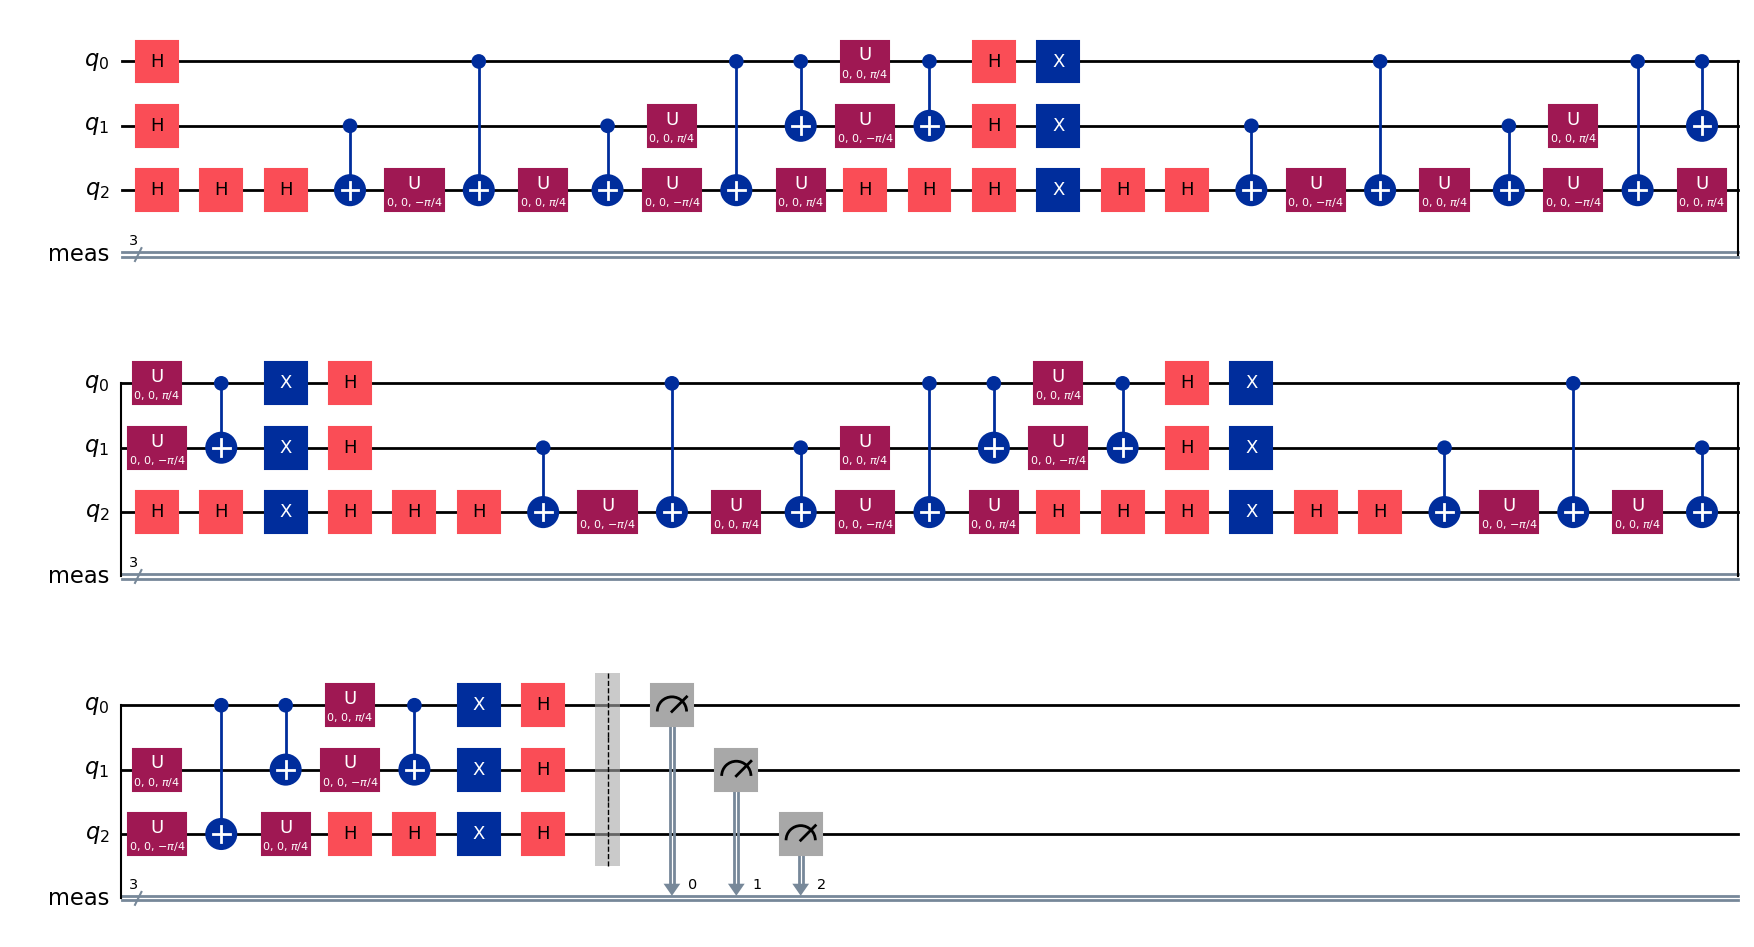

In [ ]:
#12
basis_gates = ['u', 'h', 'x', 'cx']
transpiled_qc = transpile(qc, basis_gates=basis_gates, optimization_level=0)
transpiled_qc.draw('mpl')

In [ ]:
# 13
aer_counts = run_qc_on_aer(qc)
noised_aer_counts = run_qc_on_noised_simulator(qc, backend)
ibmq_counts = run_qc_on_ibmq(qc, backend)

Using backend:AerSimulator
Using fakce backend: ibm_brisbane
Using backend: ibm_brisbane


In [ ]:
# 14
def plot_multiple_counts(counts_list, labels=None, title="Measurement Results"):
    """
    複数のcounts辞書を重ねてヒストグラムで表示する。

    Parameters:
    - counts_list: list of dict
        Qiskit実行結果のcounts（辞書）を複数渡す。
    - labels: list of str, optional
        各countsに対応するラベル。
    - title: str
        図のタイトル。
    """
    if labels is None:
        labels = [f"Run {i+1}" for i in range(len(counts_list))]

    if len(labels) != len(counts_list):
        raise ValueError("labelsの数がcounts_listと一致していません。")

    fig, ax = plt.subplots()
    plot_histogram(counts_list, legend=labels, ax=ax, title=title)
    plt.show()

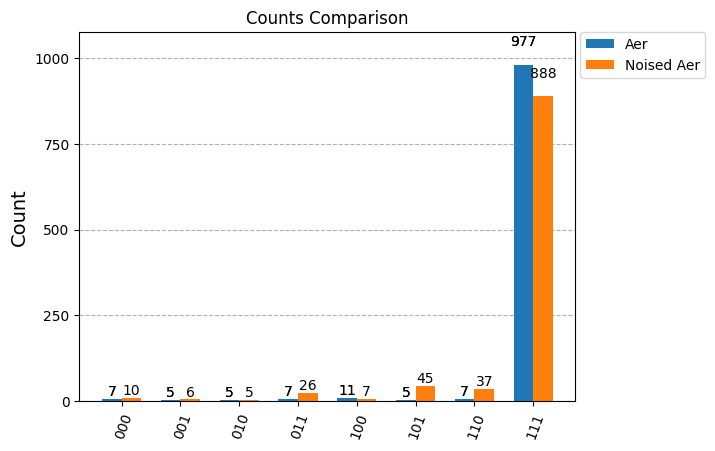

In [ ]:
%matplotlib inline
#15
plot_multiple_counts([aer_counts, noised_aer_counts], labels=["Aer", "Noised Aer"], title="Counts Comparison")

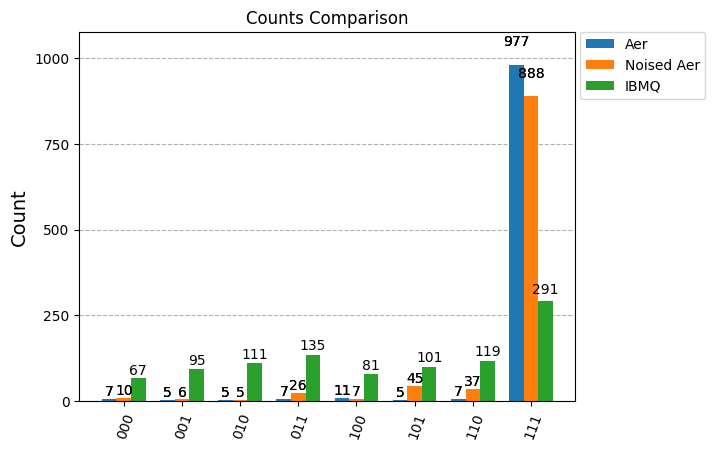

In [ ]:
%matplotlib inline
# 16
plot_multiple_counts([aer_counts, noised_aer_counts, ibmq_counts], labels=["Aer", "Noised Aer", "IBMQ"], title="Counts Comparison")

## Measurement error mitigation

In [ ]:
# 17
from itertools import product

def collect_noisy_counts(n, backend, run_fn):
    """
    n量子ビットの全状態について、noisy測定結果を取得する。

    Parameters:
        n (int): 量子ビット数
        backend: 実行対象のシミュレータ/デバイス
        run_fn: 量子回路を実行する関数（qc, backend） -> counts

    Returns:
        List[dict]: 各理想状態での測定結果（noisy_counts）
    """
    noisy_counts = []
    bitstrings = [''.join(bits) for bits in product('01', repeat=n)]

    for state in bitstrings:
        qc = QuantumCircuit(n, n)
        # 初期化（Xゲートで |1⟩ をセット）
        for i, bit in enumerate(reversed(state)):  # Qiskitはビットオーダーが逆
            if bit == '1':
                qc.x(i)
        # 測定
        qc.measure(range(n), range(n))

        counts = run_fn(qc, backend)
        noisy_counts.append(counts)
        print(f"{state} becomes {counts}")

    return noisy_counts

In [ ]:
# 18
noisy_counts = collect_noisy_counts(3, backend, run_qc_on_noised_simulator)

Using fakce backend: ibm_brisbane
000 becomes {'100': 7, '001': 32, '000': 957, '010': 28}
Using fakce backend: ibm_brisbane
001 becomes {'101': 6, '000': 33, '111': 2, '011': 16, '001': 967}
Using fakce backend: ibm_brisbane
010 becomes {'011': 38, '110': 4, '000': 32, '010': 950}
Using fakce backend: ibm_brisbane
011 becomes {'001': 29, '000': 1, '010': 30, '111': 6, '011': 958}
Using fakce backend: ibm_brisbane
100 becomes {'111': 2, '101': 36, '000': 6, '110': 27, '100': 953}
Using fakce backend: ibm_brisbane
101 becomes {'110': 1, '001': 13, '100': 40, '111': 22, '101': 948}
Using fakce backend: ibm_brisbane
110 becomes {'101': 2, '100': 20, '111': 39, '010': 19, '110': 944}
Using fakce backend: ibm_brisbane
111 becomes {'100': 1, '001': 1, '010': 2, '110': 34, '101': 30, '011': 10, '111': 946}


In [ ]:
# 19
import numpy as np
def make_matrix(noisy_counts):
    """
    noisy_counts（各理想状態での実測count）から遷移確率行列を作成。
    各行: 理想ビット列
    各列: 実測ビット列
    出力: numpy.ndarray, 並び順: sorted(bitstrings)
    """
    # 全ビット列のリストを辞書のキーから収集し、昇順で固定
    all_bitstrings = sorted({bit for counts in noisy_counts for bit in counts})
    n = len(all_bitstrings)

    matrix = np.zeros((n, n))

    for i, counts in enumerate(noisy_counts[:n]):
        total = sum(counts.values())
        for j, bit in enumerate(all_bitstrings):
            matrix[i, j] = counts.get(bit, 0) / total if total > 0 else 0.0

    return matrix, all_bitstrings

In [ ]:
# 20
M= make_matrix(noisy_counts)
M

(array([[0.93457031, 0.03125   , 0.02734375, 0.        , 0.00683594,
         0.        , 0.        , 0.        ],
        [0.03222656, 0.94433594, 0.        , 0.015625  , 0.        ,
         0.00585938, 0.        , 0.00195312],
        [0.03125   , 0.        , 0.92773438, 0.03710938, 0.        ,
         0.        , 0.00390625, 0.        ],
        [0.00097656, 0.02832031, 0.02929688, 0.93554688, 0.        ,
         0.        , 0.        , 0.00585938],
        [0.00585938, 0.        , 0.        , 0.        , 0.93066406,
         0.03515625, 0.02636719, 0.00195312],
        [0.        , 0.01269531, 0.        , 0.        , 0.0390625 ,
         0.92578125, 0.00097656, 0.02148438],
        [0.        , 0.        , 0.01855469, 0.        , 0.01953125,
         0.00195312, 0.921875  , 0.03808594],
        [0.        , 0.00097656, 0.00195312, 0.00976562, 0.00097656,
         0.02929688, 0.03320312, 0.92382812]]),
 ['000', '001', '010', '011', '100', '101', '110', '111'])

In [ ]:
# 21
def correct_counts(raw_counts, transition_matrix, bit_order):
    """
    測定ノイズ遷移行列から実測カウントを補正。

    Parameters:
        raw_counts (dict): 実測されたカウント辞書
        transition_matrix (np.ndarray): 理想→実測の遷移行列
        bit_order (list of str): ビット列の並び順（transition_matrixの順序に対応）

    Returns:
        dict: 補正されたカウント辞書（float値）
    """
    y = np.array([raw_counts.get(b, 0) for b in bit_order], dtype=float)

    try:
        A_inv = np.linalg.inv(transition_matrix)
    except np.linalg.LinAlgError:
        raise ValueError("遷移行列が特異（逆行列が存在しません）")

    x = np.dot(A_inv, y)
    x = np.clip(x, 0, None)

    return {bit: x[i] for i, bit in enumerate(bit_order)}

In [ ]:
# 22
noised_aer_counts

{'100': 7,
 '000': 10,
 '010': 5,
 '110': 37,
 '101': 45,
 '001': 6,
 '011': 26,
 '111': 888}

In [ ]:
# 23
noised_aer_counts_mitigated = correct_counts(noised_aer_counts, M[0], M[1])

In [ ]:
# 24
noised_aer_counts_mitigated

{'000': np.float64(10.428556441353331),
 '001': np.float64(3.493853395837187),
 '010': np.float64(4.175988097009477),
 '011': np.float64(21.53042530679314),
 '100': np.float64(4.44864432025826),
 '101': np.float64(26.090065999723244),
 '110': np.float64(0.23533501488778796),
 '111': np.float64(960.1371013768754)}

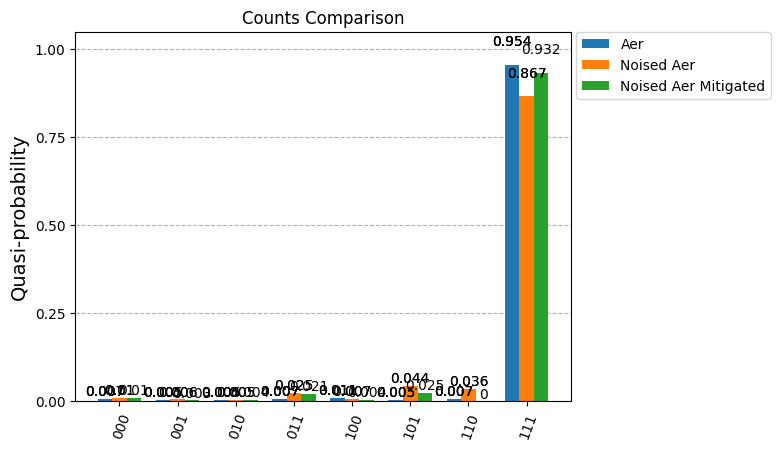

In [ ]:
%matplotlib inline
# 25
plot_multiple_counts([aer_counts, noised_aer_counts, noised_aer_counts_mitigated], labels=["Aer", "Noised Aer", "Noised Aer Mitigated"], title="Counts Comparison")

## Zero Noise Extrapolation

In [ ]:
# 26
def fold_circuit(circuit: QuantumCircuit, scale_factor: int) -> QuantumCircuit:
    if scale_factor % 2 == 0 or scale_factor < 1:
        raise ValueError("scale_factor must be an odd integer >= 1")

    folded = QuantumCircuit(circuit.num_qubits, circuit.num_clbits)

    qubit_map = {q: folded.qubits[i] for i, q in enumerate(circuit.qubits)}
    clbit_map = {c: folded.clbits[i] for i, c in enumerate(circuit.clbits)}

    for instr, qargs, cargs in circuit.data:
        new_qargs = [qubit_map[q] for q in qargs]
        new_cargs = [clbit_map[c] for c in cargs]

        if instr.name == "measure":
            # 測定ゲートはそのまま追加（foldしない）
            folded.append(instr, new_qargs, new_cargs)
        else:
            for _ in range((scale_factor - 1) // 2):
                folded.append(instr, new_qargs, new_cargs)
                if instr.inverse() is not None:
                    folded.append(instr.inverse(), new_qargs, new_cargs)
            folded.append(instr, new_qargs, new_cargs)

    return folded

In [ ]:
# 27
def run_expectation(circuit: QuantumCircuit, shots=1024) -> float:
    """
    Z期待値の計算（Z⊗Z⊗...⊗Z の平均値）
    """
    transpiled = transpile(circuit, backend)
    job = backend.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # 各ビットのZ期待値 = +1 (0), -1 (1)
    def z_parity(bitstring):
        return sum(1 if b == '0' else -1 for b in bitstring)

    total = sum(z_parity(bits) * count for bits, count in counts.items())
    return total / (shots * circuit.num_qubits)

In [ ]:
# 28
def run_zne(
    circuit: QuantumCircuit,
    run_fn,
    backend=None,
    scale_factors=[1, 3, 5],
    shots=1024
):
    """
    ゲートfoldingベースのZNE実行関数（run_fnで回路を実行）
    """
    results = []

    for scale in scale_factors:
        folded = fold_circuit(circuit, scale)
        folded.measure_all()  # 測定が消えていたら再付与
        counts = run_fn(folded) if backend is None else run_fn(folded, backend)

        # 複数量子ビットのZ期待値
        def z_expectation(counts_dict):
            total = sum(counts_dict.values())
            exp = 0
            for bitstring, count in counts_dict.items():
                z = sum(1 if b == '0' else -1 for b in bitstring)
                exp += z * count
            return exp / (total * len(bitstring))  # 正規化

        exp_val = z_expectation(counts)
        print(f"Scale {scale}: {exp_val:.4f}")
        results.append(exp_val)

    # 線形外挿
    coeffs = np.polyfit(scale_factors, results, deg=1)
    zero_noise = np.polyval(coeffs, 0)

    # 可視化
    plt.plot(scale_factors, results, 'o-', label="Noisy results")
    plt.axhline(zero_noise, color='r', linestyle='--', label=f"ZNE extrapolated ≈ {zero_noise:.4f}")
    plt.xlabel("Noise scale")
    plt.ylabel("Z expectation (avg over qubits)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return zero_noise

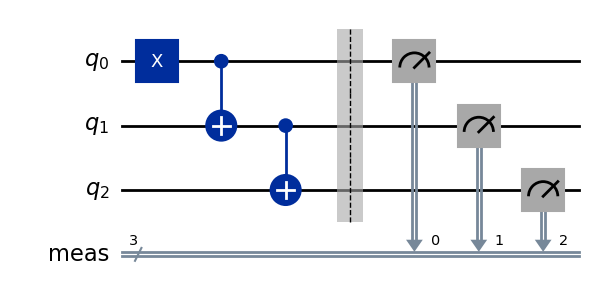

In [ ]:
# 29
qc = QuantumCircuit(3)
qc.x(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()
qc.draw('mpl')

<ipython-input-28-89b30487745b>:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit.data:


Using backend:AerSimulator
Scale 1: -1.0000
Using backend:AerSimulator
Scale 3: -1.0000
Using backend:AerSimulator
Scale 5: -1.0000


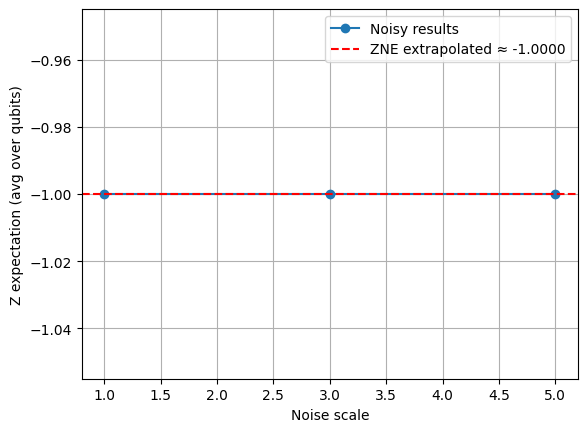

In [ ]:
# 30
zne_result = run_zne(qc, run_qc_on_aer)

Using fakce backend: ibm_brisbane


<ipython-input-28-89b30487745b>:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit.data:


Scale 1: -0.9520
Using fakce backend: ibm_brisbane


<ipython-input-28-89b30487745b>:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit.data:


Scale 3: -0.9484
Using fakce backend: ibm_brisbane


<ipython-input-28-89b30487745b>:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit.data:


Scale 5: -0.9595


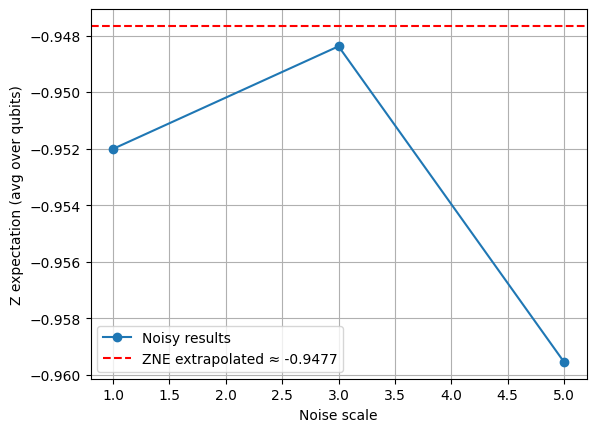

In [ ]:
# 31
zne_result = run_zne(qc, run_qc_on_noised_simulator, backend=backend)

Using backend: ibm_brisbane


<ipython-input-28-89b30487745b>:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit.data:


Scale 1: -0.8810
Using backend: ibm_brisbane
Scale 3: -0.7750
Using backend: ibm_brisbane
Scale 5: -0.7193


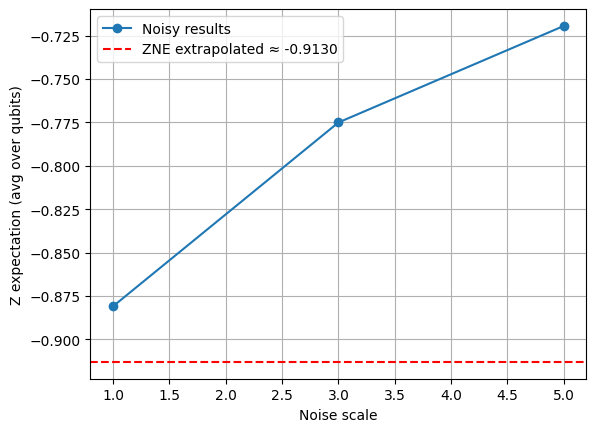

ZNE期待値（スケール0外挿）: -0.9130277777777774


In [ ]:
# 32
zne_result = run_zne(qc, run_qc_on_ibmq, backend=backend)
print("ZNE期待値（スケール0外挿）:", zne_result)

# トランスパイラ

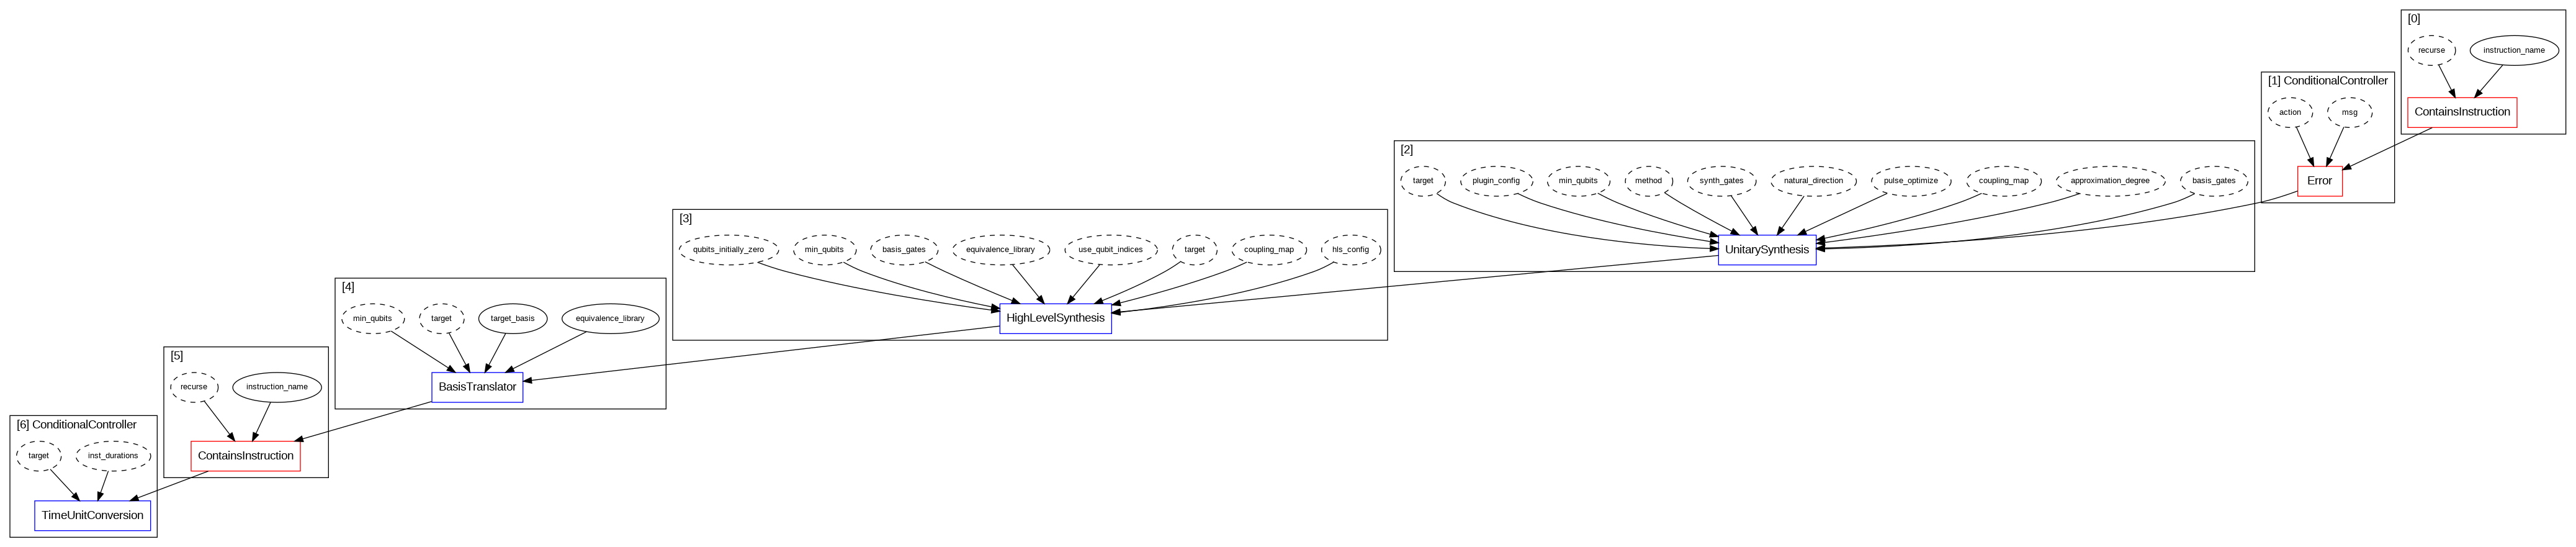

In [ ]:
# 33
pm = generate_preset_pass_manager(optimization_level=0)
pass_manager_drawer(pm)
# Google colabだとGraphvizがうまく動かないかもしれません

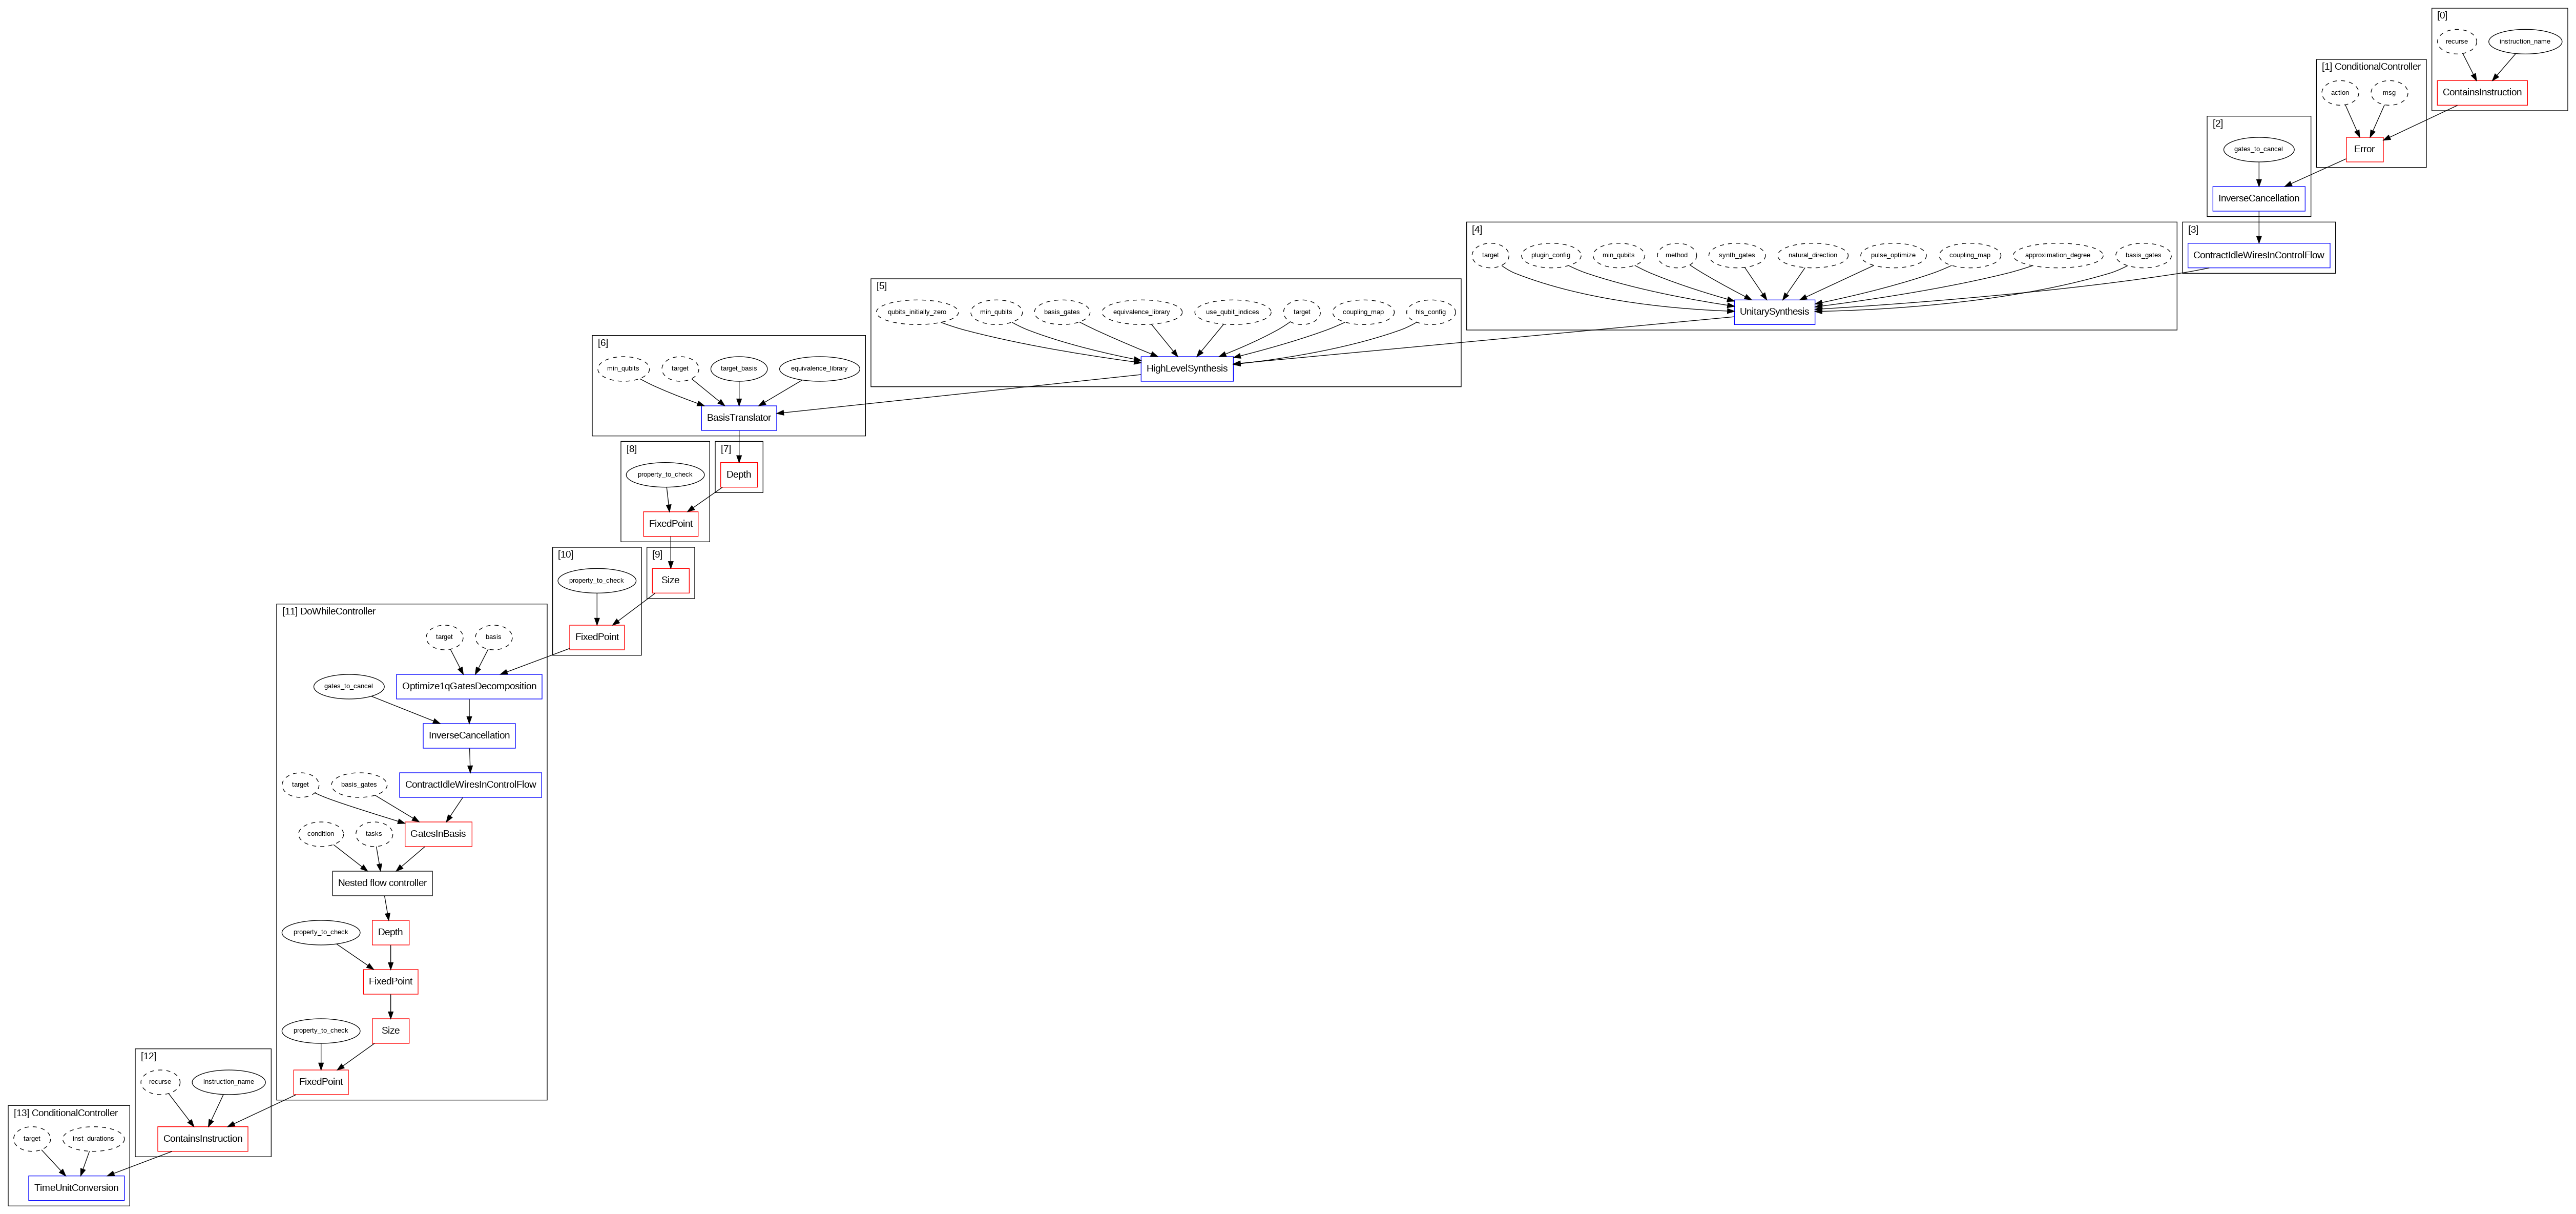

In [ ]:
# 34
pm = generate_preset_pass_manager(optimization_level=1)
pass_manager_drawer(pm)

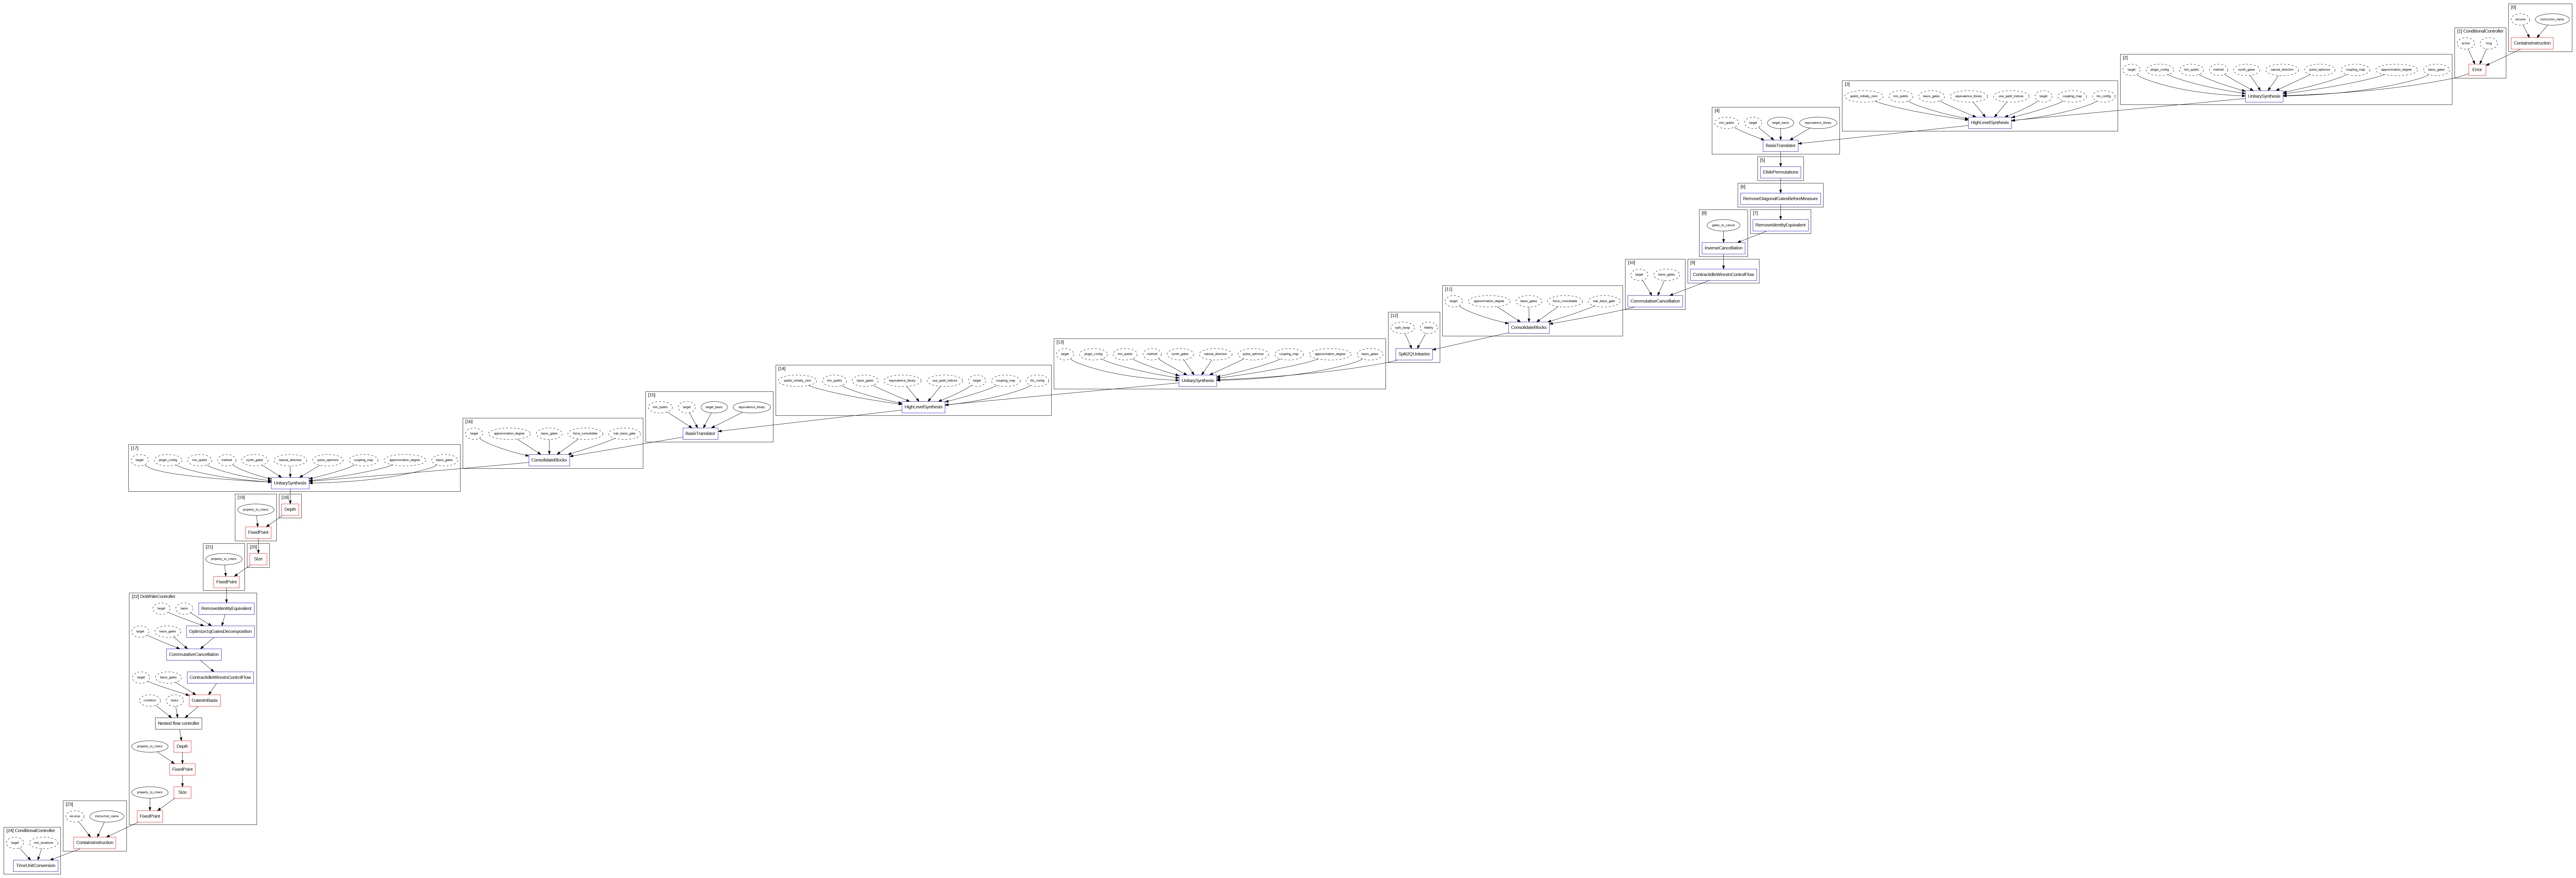

In [ ]:
# 35
pm = generate_preset_pass_manager(optimization_level=2)
pass_manager_drawer(pm)

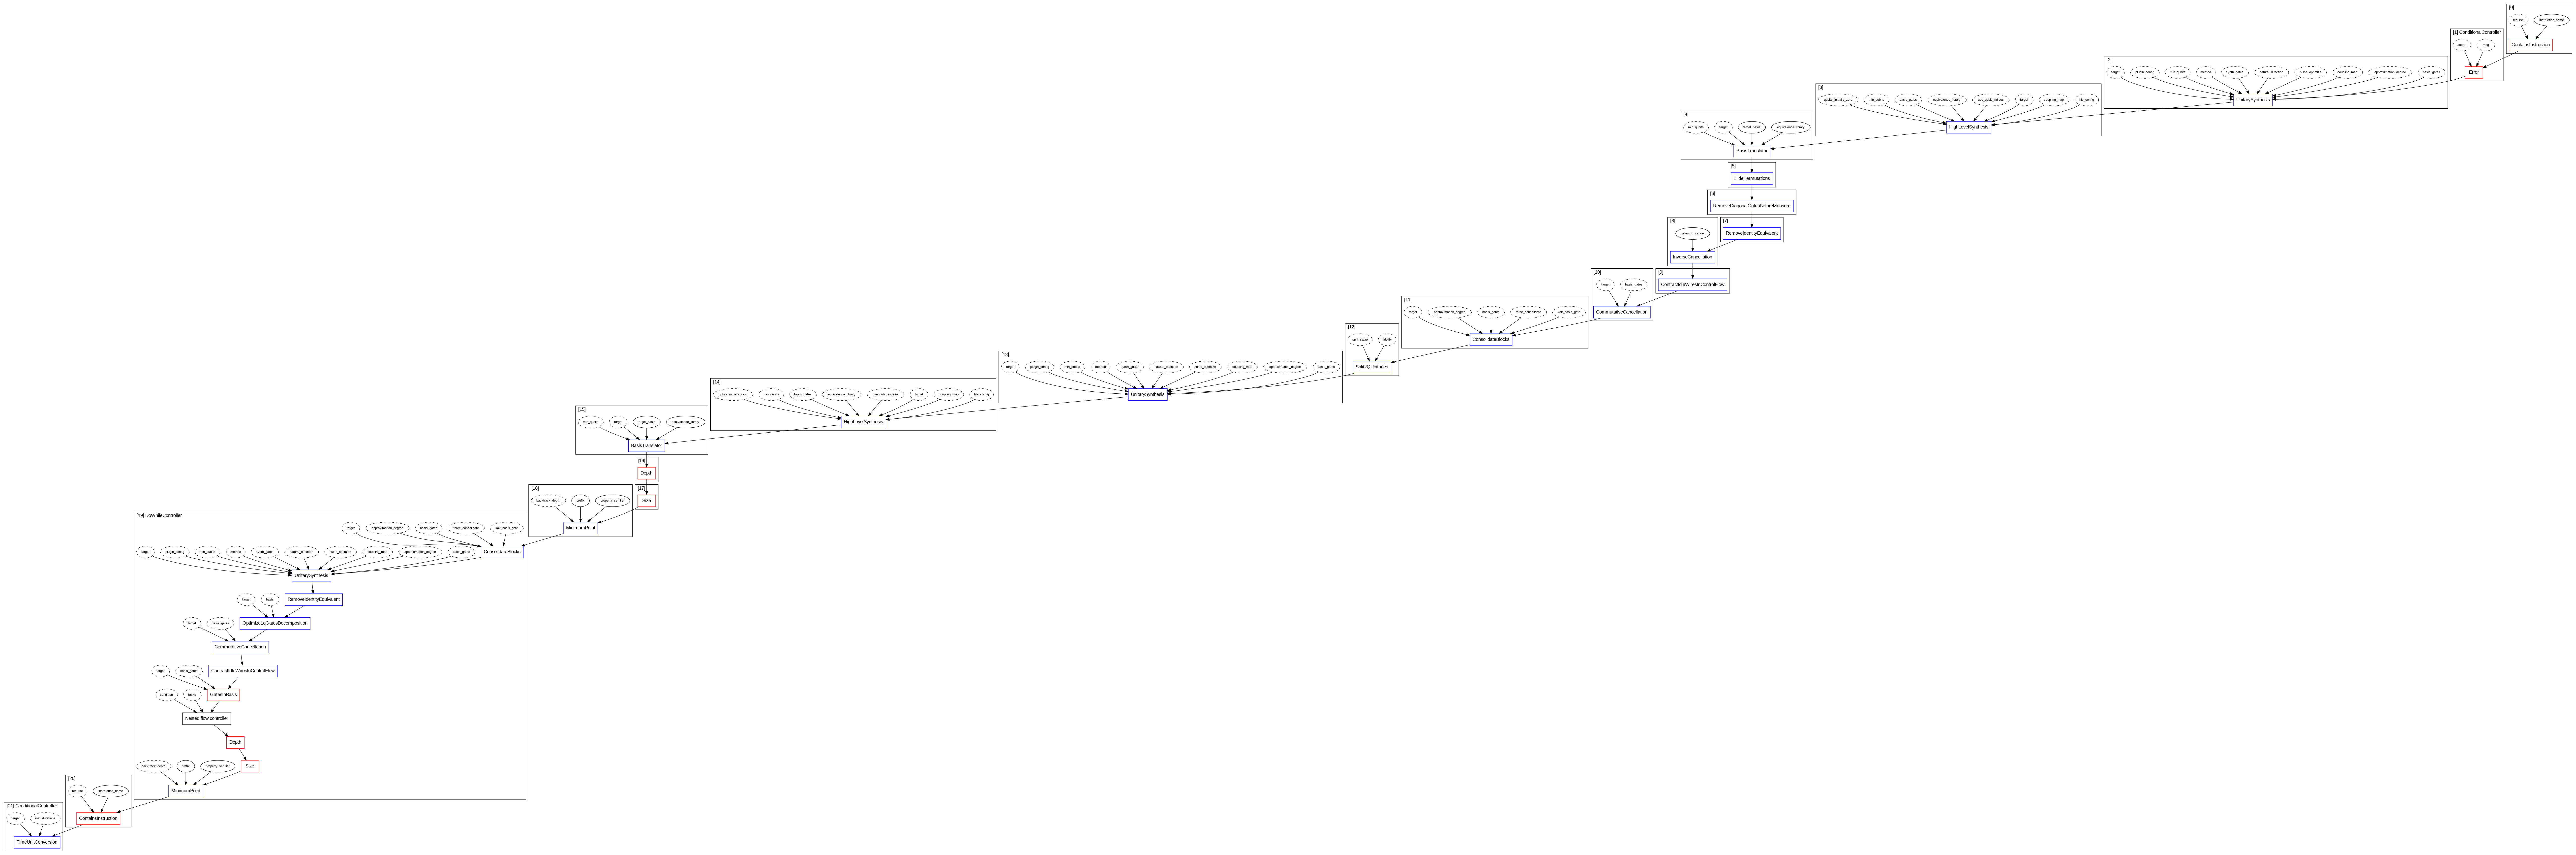

In [ ]:
# 36
pm = generate_preset_pass_manager(optimization_level=3)
pass_manager_drawer(pm)

In [ ]:
# 37
decomposed_qc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=0)
decomposed_qc.draw(output='mpl')
decomposed_qc.count_ops()

OrderedDict([('measure', 3), ('cx', 2), ('u', 1), ('barrier', 1)])

In [ ]:
# 38
decomposed_qc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=1)
decomposed_qc.draw(output='mpl')
decomposed_qc.count_ops()

OrderedDict([('measure', 3), ('cx', 2), ('u', 1), ('barrier', 1)])

In [ ]:
# 39
decomposed_qc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=2)
decomposed_qc.draw(output='mpl')
decomposed_qc.count_ops()

OrderedDict([('measure', 3), ('cx', 2), ('u', 1), ('barrier', 1)])

In [ ]:
# 40
decomposed_qc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=3)
decomposed_qc.draw(output='mpl')
decomposed_qc.count_ops()

OrderedDict([('measure', 3), ('cx', 2), ('u', 1), ('barrier', 1)])

# 演習　(選択自由課題)
1. Measurement Error Mitigation を実機で実行してください。
2. Measurement Error MitigationとZero Noise Extrapolationを併用して性能に改善が見られるか確かめてください。